# House Prices - Advanced Regression Techniques
**Dataset's description:**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often-cited Boston Housing dataset. If you want to know more about it, kindly give a check to the [Competition Webpage](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

We'll start with the reading in the data and understanding its basics.

## Loading Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # Linear Algebra
import pandas as pd # Data processing
from scipy import stats #Stats frameworks

#Visualisation frameworks
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns

#tools for transformation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder #Categorical features
from scipy.special import inv_boxcox #Remove box-cox transformation
from scipy.special import boxcox1p # Box-cox transformation

In [2]:
#Loading data
train = pd.read_csv('C:/Kaggle/ames-house-price/train.csv')
test = pd.read_csv('C:/Kaggle/ames-house-price/test.csv')
sub = pd.read_csv('C:/Kaggle/ames-house-price/sample_submission.csv')

#Printing shape of each file
print("The train data size is : {} ".format(train.shape))
print("The test data size is : {} ".format(test.shape))
print("The sub data size is : {} ".format(sub.shape))

#Printing head first 5 rows
train.head()

The train data size is : (1460, 81) 
The test data size is : (1459, 80) 
The sub data size is : (1459, 2) 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


We can notice that we have one more column on the train data frame than on the test. This happens because we don't have the column SalePrice on test data, this column is what we'll try to predict, also known as the dependent variable.

We must take a look at how our submission file should look before going forward on our project:

In [4]:
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


To submit our models, we'll need the ID column that comes from the test data frame and the predicted values of the Sale Price column. Let's save for now the ID columns from train and test and drop it since we're not going to use it until submission.

In [5]:
#Train
train_ID = train['Id']
train = train.drop('Id', axis=1)

#Test
test_ID = test['Id']
test = test.drop('Id', axis=1)

#Validating
print("The train data size is : {} ".format(train.shape))
print("The test data size is : {} ".format(test.shape))

The train data size is : (1460, 80) 
The test data size is : (1459, 79) 


Our dataset is huge, having a total of 79 columns. Let's read the data frame documentation so we can understand what each column represents:

In [6]:
description = open('C:/Kaggle/ames-house-price/data_description.txt', "r")
print(description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

We can see that most of the columns are categorical. Later on, we must separate them between Ordinal and Nominal before encoding them.

## Dependent Variable | Sales Price

Because there is too much information in our DataFrame, let's check which columns have a higher correlation with our dependent variable.

In [7]:
#Setting light pallete for our table
cmap = sns.light_palette("red", as_cmap = True)

#Listing correlation (top 10)
correlation = train.corr()['SalePrice'].abs().sort_values(ascending = False).to_frame()[1:11]

#Making a table for visualization
table = correlation.style.background_gradient(cmap = cmap)
table

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


Our dependent variable has a high correlation with the following columns:

* OverallQual: Rates the overall material and finish of the house.
* GrLivArea: Above grade (ground) living area square feet;
* GarageCars: Size of garage in car capacity;
* GarageArea: Size of garage in square feet.
* TotalBsmtSF: Total square feet of basement area;
* 1stFlrSF: First Floor square feet;

This means that a change in one of these columns results in a similar or opposite change in the Sale Price column. So to start our analysis, first we'll plot our dependent variable, and after we'll plot the relationship from it and the independent variables above.

Skewness: 1.882876


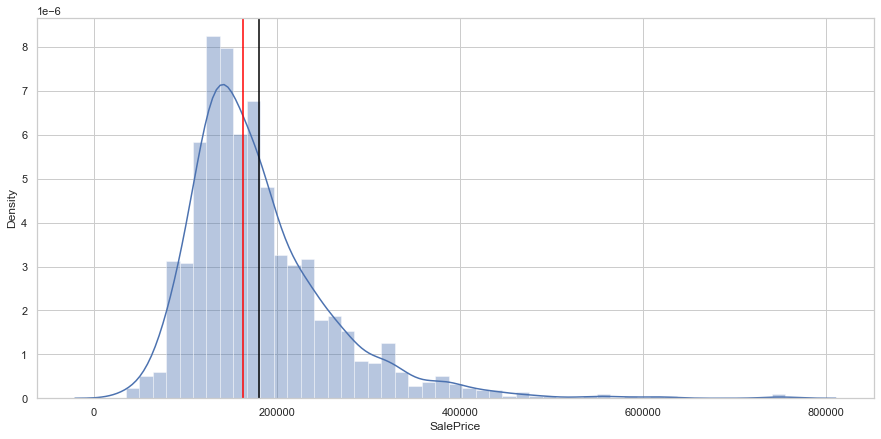

In [8]:
#Setting white grid for all graphs
sns.set(style="whitegrid")

#Setting figure size
plt.figure(figsize=(15, 7))

#Creating figure
sns.distplot(train['SalePrice'])
#Creating MEAN BLACK line
plt.axvline(train['SalePrice'].mean(), c = 'black')
#Creating MEDIAN RED line
plt.axvline(train['SalePrice'].median(), c = 'red')

#Printing results
print("Skewness: %f" % train['SalePrice'].skew())
plt.show()

Some points that we can highlight from the plot:

* The black line represents the mean value from SalePrice and the red the median.
* Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
* We can note that the values in the SalePrice column don't follow a normal distribution, which means that it does not have a "bell-shaped curve". 
    
 Machine Learning algorithms work better when our data is normally distributed, so it's a good practice to normalize our data. But how can we do it?   
 
 - To normalize our data, we can use many methods, like Box-Cox transformation or log transformation. Let's test out a few methods and compare the results.

**Log transformation**

Skewness / Assimetria: 0.121335


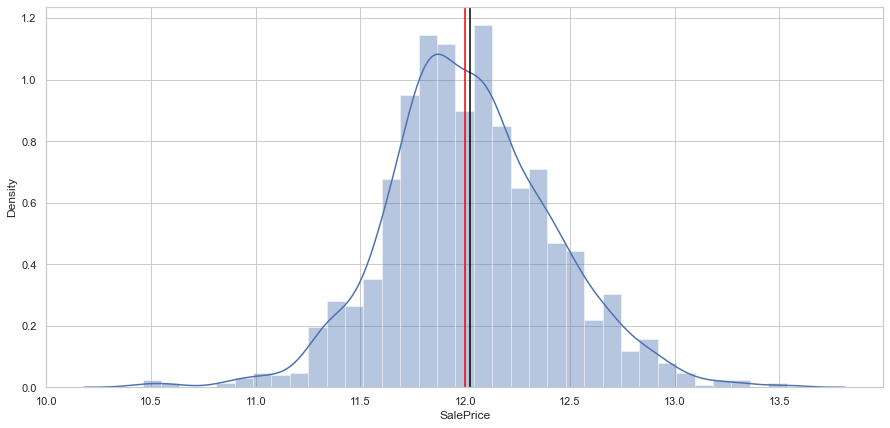

In [9]:
#Setting figure size
plt.figure(figsize=(15, 7))

#Making log transformation
SalePrice_log = (np.log(train['SalePrice']))

#Creating figure
sns.distplot(SalePrice_log)
#Creating MEAN BLACK line
plt.axvline(SalePrice_log.mean(), c = 'black')
#Creating MEDIAN RED line
plt.axvline(SalePrice_log.median(), c = 'red')


#Printing results
print("Skewness / Assimetria: %f" % SalePrice_log.skew())
plt.show()

Log transformation has done a good job making our data look like a bell-shaped curve, but we can note that it still has skewness. Let's try out another method to see if we can reduce even more the skewness.

**Box-Cox Transformation**

Skewness / Assimetria: -0.008653


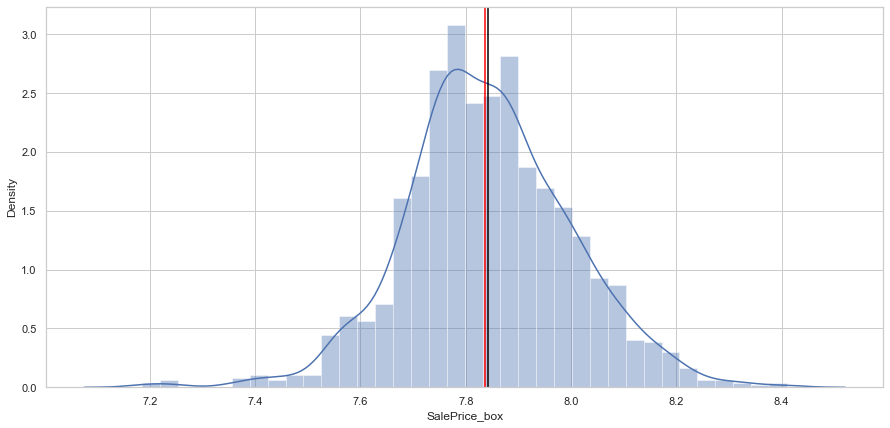

In [10]:
#Setting figure size
plt.figure(figsize=(15, 7))

#Making log transformation
train['SalePrice_box'], x_lambda = stats.boxcox(train['SalePrice'])

#Creating figure
sns.distplot(train['SalePrice_box'])
#Creating MEAN BLACK line
plt.axvline(train['SalePrice_box'].mean(), c = 'black')
#Creating MEDIAN RED line
plt.axvline(train['SalePrice_box'].median(), c = 'red')

#Printing results
print("Skewness / Assimetria: %f" % train['SalePrice_box'].skew())
plt.show()

Box-Cox transformation reduced our skewness to almost 0, and now our data is normally distributed. Let's make a new column on our data frame with this transformation. 

*Note: We must transform our predicted values back to normal before submitting our results.*

Let's analyze the variables with high correlation.

### Independent Variables

**OverallQual:**

Rates the overall material and finish of the house: 
* 1 Very Poor - 10 Very Excellent

Text(0.5, 1.0, 'Relationship between SalePrice and OverallQual')

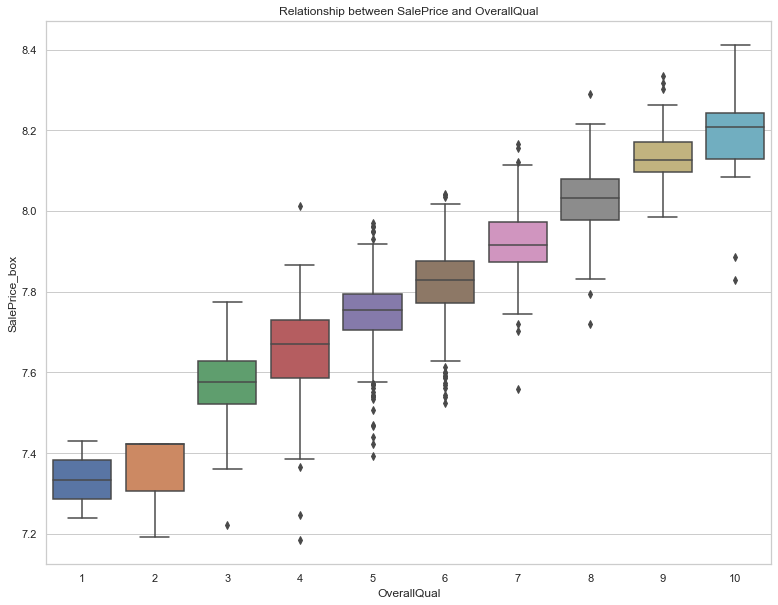

In [11]:
#Setting figure size
plt.figure(figsize=(13,10))

#Creating box plot figure
ax = sns.boxplot(x="OverallQual", y='SalePrice_box', data=train)

#Setting our Title
plt.title('Relationship between SalePrice and OverallQual')

It's very clear the positive correlation between the variable, but there are many outliers, mostly on the central categories.

**GrLivArea:**

Above grade (ground) living area square feet. 

In [12]:
train['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice_box'>

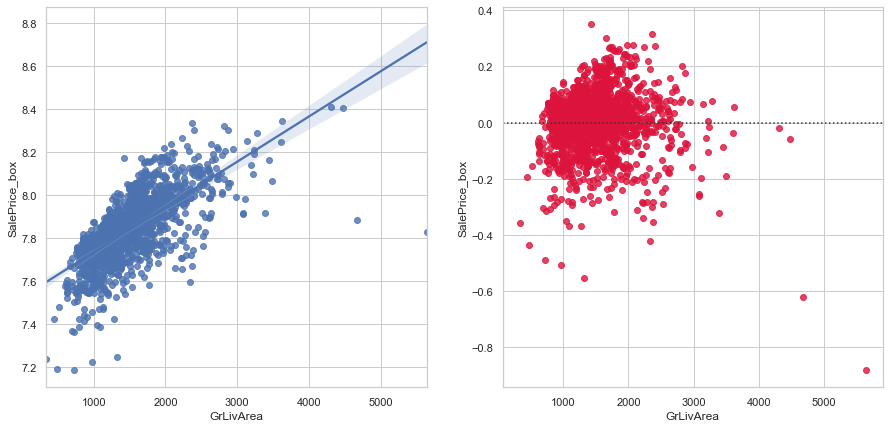

In [13]:
#Setting figure size and number of plots
fig, axs = plt.subplots(ncols=2, figsize=(15,7))

#First plot (blue)
sns.regplot(x='GrLivArea', y='SalePrice_box', data=train, ax=axs[0])

#Second plot (red)
sns.residplot(x='GrLivArea', y='SalePrice_box', data=train, color='crimson', ax=axs[1])

We can note the presence of some outliers on our data between the range of 4500 and 5000. Because they don't have any resemblance with the rest of our data, let's remove both observations.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice_box'>

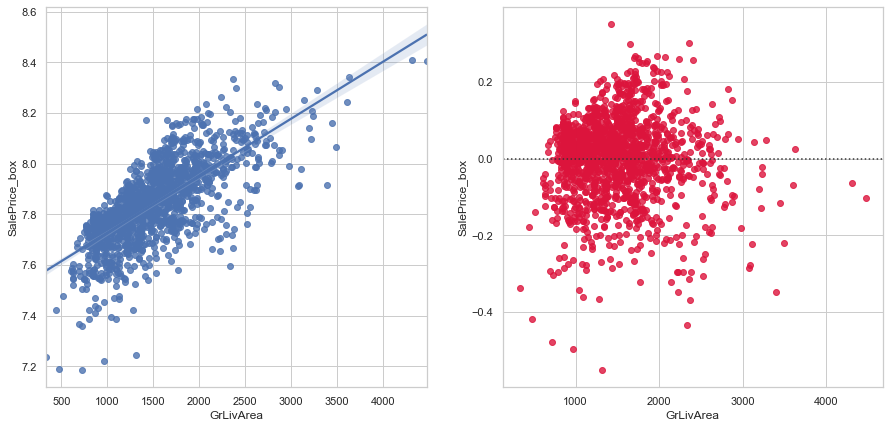

In [14]:
#Dropping both observations
train = train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice_box']<8)].index)

#Setting figure size and number of plots
fig, axs = plt.subplots(ncols=2, figsize=(15,7))
#First plot (blue)
sns.regplot(x='GrLivArea', y='SalePrice_box', data=train, ax=axs[0])
#Second plot (red)
sns.residplot(x='GrLivArea', y='SalePrice_box', data=train, color='crimson', ax=axs[1])

**GarageCars and GarageArea:**

Size of garage in car capacity / Size of garage in square feet.

In [15]:
garages = train[['GarageCars', 'GarageArea']]
garages.describe()

,GarageCars,GarageArea
count,1458.000000,1458.000000
mean,1.766118,472.050069
std,0.747104,212.239248
min,0.000000,0.000000
25%,1.000000,331.500000
50%,2.000000,479.500000
75%,2.000000,576.000000
max,4.000000,1390.000000


As both of these columns has the same purpose, just use different metrics, we should remove GarageCars since the metric from GarageArea is more reliable.

In [16]:
#Dropping Garage Cars column
train = train.drop('GarageCars', axis=1)
test = test.drop('GarageCars', axis=1)

Text(0.5, 1.0, 'Relationship between SalePrice and GarageArea')

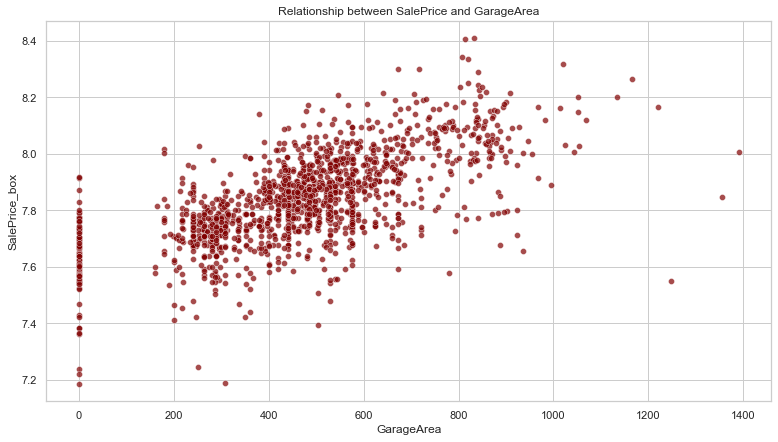

In [17]:
#Setting figure size
plt.figure(figsize=(13,7))

#Creating scatter plot
sns.scatterplot(x='GarageArea', y='SalePrice_box', data=train, color='maroon', alpha=0.7)

#Setting our Title
plt.title('Relationship between SalePrice and GarageArea')

**TotalBsmtSF**:

Total square feet of basement area;

In [18]:
train['TotalBsmtSF'].describe()

count    1458.000000
mean     1052.537037
std       414.982320
min         0.000000
25%       795.250000
50%       991.000000
75%      1296.750000
max      3206.000000
Name: TotalBsmtSF, dtype: float64

Text(0.5, 1.0, 'Relationship between SalePrice and TotalBsmtSF')

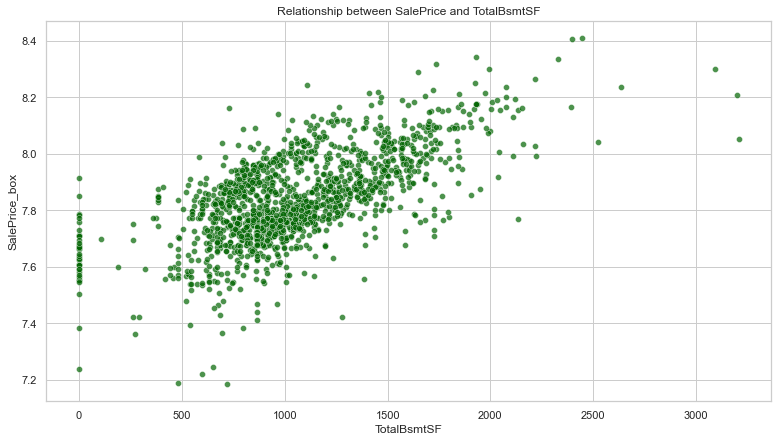

In [19]:
#Setting figure size
plt.figure(figsize=(13,7))

#Creating scatter plot
sns.scatterplot(x='TotalBsmtSF', y='SalePrice_box', data=train, color='darkgreen', alpha=0.7)

#Setting our Title
plt.title('Relationship between SalePrice and TotalBsmtSF')

**1stFlrSF:**

First Floor square feet;

In [20]:
train['1stFlrSF'].describe()

count    1458.000000
mean     1158.851166
std       372.039498
min       334.000000
25%       882.000000
50%      1086.000000
75%      1390.750000
max      3228.000000
Name: 1stFlrSF, dtype: float64

Text(0.5, 1.0, 'Relationship between SalePrice and 1stFlrSF')

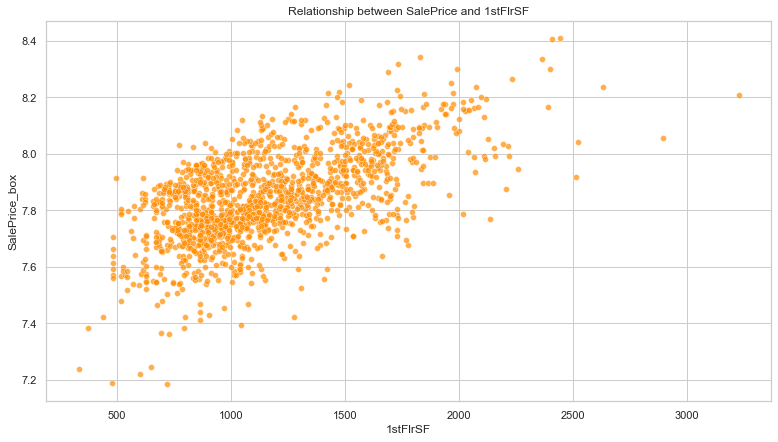

In [21]:
#Setting figure size
plt.figure(figsize=(13,7))

#Creating scatter plot
sns.scatterplot(x='1stFlrSF', y='SalePrice_box', data=train, color='darkorange', alpha=0.7)

#Setting our Title
plt.title('Relationship between SalePrice and 1stFlrSF')

The last three plots had a similar shape, probably because all the three represent the M² from some area from the house. Let's join these three variables into a new one representing the total M² of the house.

For doing this kind of transformation, we must join the train and test set so we still have the same data.

*Note: We'll use test data only to apply the transformations. We'll still train our models just with the test data to not have data leakage.

In [22]:
#Concat
ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat((train, test)).reset_index(drop=True)

#Printing results
print("The all_data size is : {} ".format(all_data.shape))
all_data.head()

The all_data size is : (2917, 80) 


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_box
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,7.932610
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,7.878263
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,7.959618
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,7.774955
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,8.002875


In [23]:
all_data['TotalSF_inside'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# all_data['TotalSF_garage'] = (all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] +
#                               all_data['GarageArea'])

#### Data Cleaning and Feature Engineering

Before creating our models, we'll need to clean our data. This includes dealing with missing values, transform columns to categorical, etc. Let's start with the missing values

In [24]:
all_data.isna().sum().sort_values(ascending=False)[:37]

PoolQC            2908
MiscFeature       2812
Alley             2719
Fence             2346
SalePrice_box     1459
SalePrice         1459
FireplaceQu       1420
LotFrontage        486
GarageFinish       159
GarageQual         159
GarageCond         159
GarageYrBlt        159
GarageType         157
BsmtCond            82
BsmtExposure        82
BsmtQual            81
BsmtFinType2        80
BsmtFinType1        79
MasVnrType          24
MasVnrArea          23
MSZoning             4
Functional           2
Utilities            2
BsmtFullBath         2
BsmtHalfBath         2
BsmtUnfSF            1
BsmtFinSF2           1
TotalBsmtSF          1
BsmtFinSF1           1
Electrical           1
TotalSF_inside       1
GarageArea           1
Exterior1st          1
SaleType             1
KitchenQual          1
Exterior2nd          1
PavedDrive           0
dtype: int64

Most of our columns are categorical, and we can note that for some of them, missing values means that it doesn't have that feature. Let's take PooQC as a example:

**PoolQC: Pool quality**
* **Ex** - Excellent; Gd - Good; 
* **TA** - Average/Typical; 
* **Fa** - Fair; 
* **NA** - No Pool.

There are also numeric columns that missing values means the same from above. Let's fill them with 'None' for categorical columns and 0 for numeric. 

In [25]:
#For categorical data
for field in ['GarageType', 'GarageFinish','GarageQual', 'GarageCond',
              'BsmtFinType1','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
              'BsmtFinType2','MiscFeature','Alley','Fence','FireplaceQu',
               'MasVnrType', 'PoolQC' ] :
    all_data[field].fillna('None',inplace=True)

#For numeric data    
for field in ['MasVnrArea','BsmtFullBath','BsmtHalfBath', 'TotalSF_inside',
              'BsmtFinSF1','GarageArea','TotalBsmtSF', 
             'BsmtUnfSF','BsmtFinSF2','GarageYrBlt']:
    all_data[field].fillna(0,inplace=True) 

#Validating results  
all_data.isna().sum().sort_values(ascending=False)[:11]

SalePrice_box    1459
SalePrice        1459
LotFrontage       486
MSZoning            4
Functional          2
Utilities           2
Electrical          1
SaleType            1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
dtype: int64

We still have some missing values. Let's look at two features "LotFrontage" and "MSZoning":

* **MSZoning:** Identifies the general zoning classification of the sale. (Its values are; Agriculture, Commercial, Industrial, etc.) 
* **LotFrontage:** Linear feet of street connected to property Electrical: Electrical system(Standard Circuit, Mixed, etc.) 

The first two features are aspects of a property that are not only related to one specific example, but instead a feature common among a neighborhood. So hopefully we can decide on its value based on how other houses in that neighborhood are. Are they commercial or agriculture? How big are this area's streets?

Also if we group all the examples by their neighborhood and Electrical Systems, we see that most houses in one area are using the same Electrical system, so we can use this approach for this feature too. We'll use the same method for 

In [26]:
#Mean for lot frontage
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage']\
                          .transform(lambda x: x.fillna(x.mean()))
#Mode for MSZoning & Electrical
for feature in ['MSZoning', 'Electrical']:
    all_data[feature] = all_data.groupby('Neighborhood')[feature]\
                        .transform(lambda x: x.fillna(x.mode()[0]))

#Validating results      
all_data.isna().sum().sort_values(ascending=False)[:10]

SalePrice_box    1459
SalePrice        1459
Utilities           2
Functional          2
Exterior2nd         1
KitchenQual         1
Exterior1st         1
SaleType            1
GarageFinish        0
GarageYrBlt         0
dtype: int64

Remaining missing values:
* Functional - Home functionality (Assume typical unless deductions are warranted)
* KitchenQual - Kitchen quality. As we have only one missing values, let's fill with the most common.
* Utilities - Type of utilities available. All values from this column is the same on test data, so we can remove it since it won't help on our predictions.
* SaleType, Exterior1st, Exterior2nd - Numeric values with only one missing values. Let's fill them with the mode.

In [27]:
#functional
all_data["Functional"] = all_data["Functional"].fillna("Typ")

#KitchenQual
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('TA')

#Utilities
all_data = all_data.drop(['Utilities'], axis=1)

#SaleType, Exterior1st, Exterior2nd
for field in ['SaleType','Exterior1st','Exterior2nd',]:
    all_data[field].fillna(all_data[field].mode()[0],inplace=True)
    
#Validating results      
all_data.isna().sum().sort_values(ascending=False)[:5]

SalePrice_box    1459
SalePrice        1459
MSSubClass          0
KitchenAbvGr        0
GarageYrBlt         0
dtype: int64

Okay, we only got missing values for saleprice columns due to test dataset, so we finished handling with missing values.

In order to construct a model we have to do a little bit of preprocessing to help the model understand our features. In general, we have two types of data; numerical and categorical.

**Numeric values** are like the size of a house, how many stories it has and so on. 

**Categorical Values** that split into two groups: 
- **Ordinal variables:** categorical data with a certain order, like the quality of grade that ranges from "Poor" to "Excellent"
- **Nominal variables:** categorical data with no specific order, like different types of roof material that can be "Metal", "Roll", "Gravel" and etc.


As you may expect we don't change anything about numeric ones as they can be easily understood by our mode. But for categoricals, we have some tools like One-Hot-encoder or Label-Encoder in Scikit-learn that help us change these variables into a numerical format that's readable for our models.

Some categorical data like CentralAir(yes and no values) and YrSold(starting from 1872 to 2010) are already in numbers so the label encoder can detect the order and give them digits starting from 0(e.g. the first year appearing in the dataset).

In [28]:
#List of columns
year_LE=['CentralAir', 'YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

#Label enconder for each column
for field in year_LE:
    le = LabelEncoder()
    all_data[field] = le.fit_transform(all_data[field].values)

In [29]:
#List of ordinal columns
list_ordinal = [ 
        'LandSlope','PavedDrive', 'MSSubClass','ExterQual', 'LotShape', 'BsmtQual','BsmtCond', 
        'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Functional', 'FireplaceQu',
        'KitchenQual', 'GarageFinish', 'GarageQual','GarageCond','Fence']

#Changing all type to string
for field in  list_ordinal:
    all_data[field] = all_data[field].astype(str)

#Listing the order that we have to Ordinal Enconde the features
orders=[#LandSlope
        ['Sev', 'Mod', 'Gtl'],
        #PavedDrive
        ['N', 'P', 'Y'],
        #MSSubClass
        ['20','30','40','45','50','60','70','75','80','85', '90','120','150','160','180','190'],
        #ExterQual
        ['Po','Fa','TA','Gd','Ex'],
        #LotShape
        ['Reg','IR1' ,'IR2','IR3'],
        #BsmtQual
        ['None','Fa','TA','Gd','Ex'],
        #BsmtCond
        ['None','Po','Fa','TA','Gd','Ex'],
        #BsmtExposure
        ['None','No','Mn','Av','Gd'],
        #BsmtFinType1
        ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ],
        #BsmtFinType2
        ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ],
        #HeatingQC
        ['Po','Fa','TA','Gd','Ex'],
        #Functional
        ['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
        #FireplaceQu
        ['None','Po','Fa','TA','Gd','Ex'],
        #KitchenQual
        ['Fa','TA','Gd','Ex'],
        #GarageFinish
        ['None','Unf','RFn','Fin'],
        #GarageQual
        ['None','Po','Fa','TA','Gd','Ex'],
        #GarageCond
        ['None','Po','Fa','TA','Gd','Ex'],
        #Fence
        ['None','MnWw','GdWo','MnPrv','GdPrv'] ]
   

#Ordinal Enconding all features 
for i in range(len(orders)):
    ord_en = OrdinalEncoder(categories = {0:orders[i]})
    all_data.loc[:,list_ordinal[i]] = ord_en.fit_transform(all_data.loc[:,list_ordinal[i]].values.reshape(-1,1))

In [30]:
print('All data shape', all_data.shape)
all_data.head()

All data shape (2917, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_box,TotalSF_inside
0,5.0,RL,65.0,8450,Pave,None,0.0,Lvl,Inside,2.0,...,0.0,None,0,2,2,WD,Normal,208500.0,7.932610,2566.0
1,0.0,RL,80.0,9600,Pave,None,0.0,Lvl,FR2,2.0,...,0.0,None,0,5,1,WD,Normal,181500.0,7.878263,2524.0
2,5.0,RL,68.0,11250,Pave,None,1.0,Lvl,Inside,2.0,...,0.0,None,0,9,2,WD,Normal,223500.0,7.959618,2706.0
3,6.0,RL,60.0,9550,Pave,None,1.0,Lvl,Corner,2.0,...,0.0,None,0,2,0,WD,Abnorml,140000.0,7.774955,2473.0
4,5.0,RL,84.0,14260,Pave,None,1.0,Lvl,FR2,2.0,...,0.0,None,0,12,2,WD,Normal,250000.0,8.002875,3343.0


In [31]:
dnumeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

def detect_skewness(df):
    skewed=pd.DataFrame(df[:].skew(axis=0).sort_values(ascending=False),columns=['skewness'])
    return skewed

print(detect_skewness(all_data)[:10])

                skewness
MiscVal        21.950962
PoolArea       17.697766
LotArea        13.116240
LowQualFinSF   12.090757
3SsnPorch      11.377932
KitchenAbvGr    4.302763
BsmtFinSF2      4.146636
EnclosedPorch   4.004404
ScreenPorch     3.947131
BsmtHalfBath    3.932018


In [32]:
#Let's make these changes in a new DF
all_data_t = all_data.drop(['SalePrice_box', 'SalePrice'], axis=1)

# Calculating skewness for all columns
skew_df = detect_skewness(all_data_t)
# skewed more than 0.3?
skewed_features = skew_df[(skew_df.skewness>0.3)|(skew_df.skewness<-0.3)].index

#Transforming every column that skew > 0.3
for field in list(skewed_features):
     all_data_t[field] = boxcox1p(all_data_t[field],stats.boxcox_normmax(all_data_t[field]+1))

#Printing results
all_data_t.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF_inside
0,3.533116,RL,18.780786,13.833053,Pave,None,0.000000,Lvl,Inside,7.048158,...,0.0,None,0.0,None,0.0,2,2,WD,Normal,92.223560
1,0.000000,RL,21.443061,14.117917,Pave,None,0.000000,Lvl,FR2,7.048158,...,0.0,None,0.0,None,0.0,5,1,WD,Normal,91.468259
2,3.533116,RL,19.331294,14.476511,Pave,None,0.817016,Lvl,Inside,7.048158,...,0.0,None,0.0,None,0.0,9,2,WD,Normal,94.696535
3,4.091083,RL,17.840337,14.106195,Pave,None,0.817016,Lvl,Corner,7.048158,...,0.0,None,0.0,None,0.0,2,0,WD,Abnorml,90.542400
4,3.533116,RL,22.118472,15.022007,Pave,None,0.817016,Lvl,FR2,7.048158,...,0.0,None,0.0,None,0.0,12,2,WD,Normal,105.197584


In [33]:
#Let's add a new to sum up all bathrooms features
all_data_t['Total_Bathrooms'] = (all_data_t['FullBath'] + (0.5 * all_data_t['HalfBath']) +
                               all_data_t['BsmtFullBath'] + (0.5 * all_data_t['BsmtHalfBath']))

In [34]:
dummies_data = pd.get_dummies(all_data_t).reset_index(drop=True)

print('Dummies data shape', dummies_data.shape)
dummies_data.head()

Dummies data shape (2917, 230)


,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.533116,18.780786,13.833053,0.000000,7.048158,7,3.991517,316.322327,192.109445,19.433175,...,0,0,0,1,0,0,0,0,1,0
1,0.000000,21.443061,14.117917,0.000000,7.048158,6,6.000033,221.521303,72.142675,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,3.533116,19.331294,14.476511,0.817016,7.048158,7,3.991517,309.059102,187.114310,17.768840,...,0,0,0,1,0,0,0,0,1,0
3,4.091083,17.840337,14.106195,0.817016,7.048158,7,3.991517,49.092956,50.479708,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,3.533116,22.118472,15.022007,0.817016,7.048158,8,3.991517,305.441137,177.238319,25.404165,...,0,0,0,1,0,0,0,0,1,0


Okay, now that we have finished transforming our data, let's split back test and train and start building our models.

### Model Building

In [35]:
# Our Models
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

# Tools to create our models
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

# Metrics and cross-validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [36]:
#Test
test_df = dummies_data.iloc[ntrain:, :]

#Train
train_df = dummies_data.iloc[:ntrain, :]

#Printing results
print("Test size is: {}".format(test.shape))
print("Train size is: {}".format(train.shape))

Test size is: (1459, 78)
Train size is: (1458, 80)


In [37]:
#Variables for train
X_train = train_df.copy()
y_train = train['SalePrice_box']

#Variable for test
X_test = test_df.copy()

#Validation
print(X_train.shape, y_train.shape, X_test.shape)

(1458, 230) (1458,) (1459, 230)


*   **METRICS**

Submissions are evaluated on **Root-Mean-Squared-Error (RMSE)** between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

So let's use RMSE as our default metric for our models. Since we have a small dataset, we'll need to use cross-validation strategy so we don't have too many overfitting issues.

In [38]:
#Metric function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=1).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train,
                                   scoring="neg_mean_squared_error", cv = kf))
    
    return(rmse)

* **MODELS**

First we'll test out some models like regression and gradient boosting, and then we'll make we'll use stacking and blending techniques.

In [39]:
#Settings our parameters:
#Lasso Regression params
lasso_params = {
    'alpha': 0.00021
}

#Ridge Regression params
ridge_params = {
    'alpha': 14.1
}

#Elastic Net params
ENet_params = {
    'alpha':0.0004, 
    'l1_ratio':0.46
}

#XGBRegreesion params
XGBr_params = {
    'learning_rate':0.0063, 
    'n_estimators': 2222, 
    'max_depth': 10,
    'reg_alpha':0.136, 
    'reg_lambda': 0.153,
    'subsample':0.123,
    'n_jobs':-1
}

In [40]:
#Creating our model
lasso = make_pipeline(RobustScaler(), Lasso(alpha = lasso_params['alpha'], 
                                                  random_state=1, tol=0.0001))

#Printing score
score = rmsle_cv(lasso)
print("Lasso score: \nMean: {:.6f}\nStandard Deviation: {:.4f}".format(score.mean(), score.std()))

Lasso score: 
Mean: 0.043406
Standard Deviation: 0.0059


In [41]:
#Creating our model
ridge = make_pipeline(RobustScaler(), Ridge(alpha = ridge_params['alpha'],
                                           random_state=1))

#Printing score
score = rmsle_cv(ridge)
print("Ridge score: \nMean: {:.6f}\nStandard Deviation: {:.4f}".format(score.mean(), score.std()))

Ridge score: 
Mean: 0.043906
Standard Deviation: 0.0059


In [42]:
#Creating our model
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=ENet_params['alpha'],l1_ratio=ENet_params['l1_ratio'],
                                                random_state=1, tol=0.0001))

#Printing score
score = rmsle_cv(ENet)
print("Ridge score: \nMean: {:.6f}\nStandard Deviation: {:.4f}".format(score.mean(), score.std()))

Ridge score: 
Mean: 0.043373
Standard Deviation: 0.0059


In [43]:
#Creating our model
XGBR = XGBRegressor(learning_rate = XGBr_params['learning_rate'], n_estimators = XGBr_params['n_estimators'],
                    max_depth= XGBr_params['max_depth'], reg_alpha = XGBr_params['reg_alpha'], 
                    reg_lambda = XGBr_params['reg_lambda'], subsample = XGBr_params['subsample'], 
                    n_jobs=-1, random_state=1)

#Printing score
score = rmsle_cv(XGBR)
print("XGB score: \nMean: {:.6f}\nStandard Deviation: {:.4f}".format(score.mean(), score.std()))

XGB score: 
Mean: 0.046588
Standard Deviation: 0.0054


In [44]:
estimators = [('ridge', ridge), ('lasso', lasso), ('XGBR', XGBR), ('ENet', ENet)]
stacking = StackingRegressor(estimators=estimators,
                        final_estimator=lasso)

score = rmsle_cv(stacking)
print("Stacking score: \nMean: {:.6f}\nStandard Deviation: {:.4f}".format(score.mean(), score.std()))

Stacking score: 
Mean: 0.043075
Standard Deviation: 0.0058


Let's fit our models into our data

In [45]:
print('Lasso done')
lasso_model = lasso.fit(X_train, y_train)

print('Ridge done')
ridge_model = ridge.fit(X_train, y_train)

print('ENet done')
ENet_model = ENet.fit(X_train, y_train)

print('XGB done')
XGBR_model = XGBR.fit(X_train, y_train)

print('Stacking done')
stacking_model = stacking.fit(np.array(X_train), np.array(y_train))

Lasso done
Ridge done
ENet done
XGB done
Stacking done


In [46]:
def blend_models_predict(data):
    return ((0.1 * ENet_model.predict(data)) + \
            (0.05 * lasso_model.predict(data)) + \
            (0.05 * ridge_model.predict(data)) + \
            (0.35 * XGBR_model.predict(data)) + \
            (0.45 * stacking_model.predict(np.array(data))))

Let's try our ensemble model into our training data:

In [47]:
#Printing score
blend_pred_train = blend_models_predict(X_train)

#Score
print(round(np.sqrt(mean_squared_error(y_train, blend_pred_train)), 5))

0.03385


Okay, we got a great result! Let's predict our test data and submit our model.

In [48]:
#Predicting test set
blend_pred = blend_models_predict(X_test)
blend_pred.shape

(1459,)

In [49]:
#Creating submission dataframe
sub = pd.DataFrame()
sub['Id'] = test_ID
sub.shape

(1459, 1)

In [50]:
#Adding and transforming our prediction to our submission dataframe
sub['SalePrice'] = blend_pred
sub['SalePrice'] = inv_boxcox(sub['SalePrice'], x_lambda)
sub.to_csv('C:/Kaggle/ames-house-price/submission.csv', index=False)
sub.head()

,Id,SalePrice
0,1461,122981.109591
1,1462,161546.730674
2,1463,187532.934855
3,1464,198066.562611
4,1465,191579.166878


**Conclusion:**

Thank you for reaching the end of this Notebook! This was one of my first Data Science project so I learned a lot from it. We reached top 10% on Kaggle, which is a great score for a competition that is going for more than four years.


If you have any advice, please let me know :)